In [2]:
import sys
main_path = "../../.."
sys.path.append(main_path)

# importing modules
import os
import pickle
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.scripts.common_figures import Figures

In [3]:
model_scores_path = f"{main_path}/data/processed/model_scores"
os.makedirs(model_scores_path, exist_ok=True)

with open(f"{model_scores_path}/best_scores.pkl", 'rb') as f:
    metric_results = pickle.load(f)
    
with open(f"{main_path}/config.yaml", 'r') as f:
    config = yaml.safe_load(f)

In [4]:
figures = Figures()
sns.set_context('poster', font_scale=0.8)

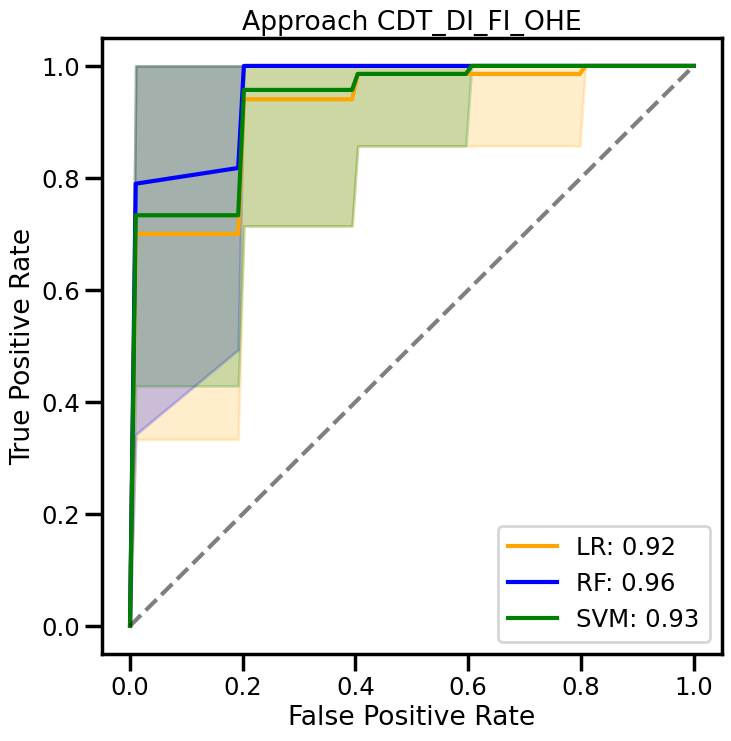

In [5]:
roc_scores = {'cdt_di_fi_ohe':[metric_results['cdt_di_fi_ohe']['lr']['rocauc'], metric_results['cdt_di_fi_ohe']['rf']['rocauc'],
                   metric_results['cdt_di_fi_ohe']['svm']['rocauc']]}

class_names = {'cdt_di_fi_ohe':'Approach CDT_DI_FI_OHE'}

classifier_names = ['LR', 'RF', 'SVM']

save = f"{main_path}/figures/paper_figures/png/roccurve_cdt_di_fi_ohe.png"
paper_figure = f"{main_path}/figures/paper_figures/svg/roccurve_cdt_di_fi_ohe.svg"
figures.draw_rocauc_curve(classifier_names, roc_scores, class_names, grid_shape=(1, 1),
                         save=save, paper_figure=paper_figure)

# Feature Importance

In [6]:
df_path = f"{main_path}/data/processed/dataframes"
cdt_di_fi_ohe = pd.read_csv(f"{df_path}/cdt_di_fi_ohe.csv")
targets = pd.read_csv(f"{df_path}/targets.csv")

c:\Users\Numan Ayaz\Desktop\abim\colorectal_cancer_prediction\src\notebooks\figures\../../..\src\scripts\common_figures.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train_std, y)


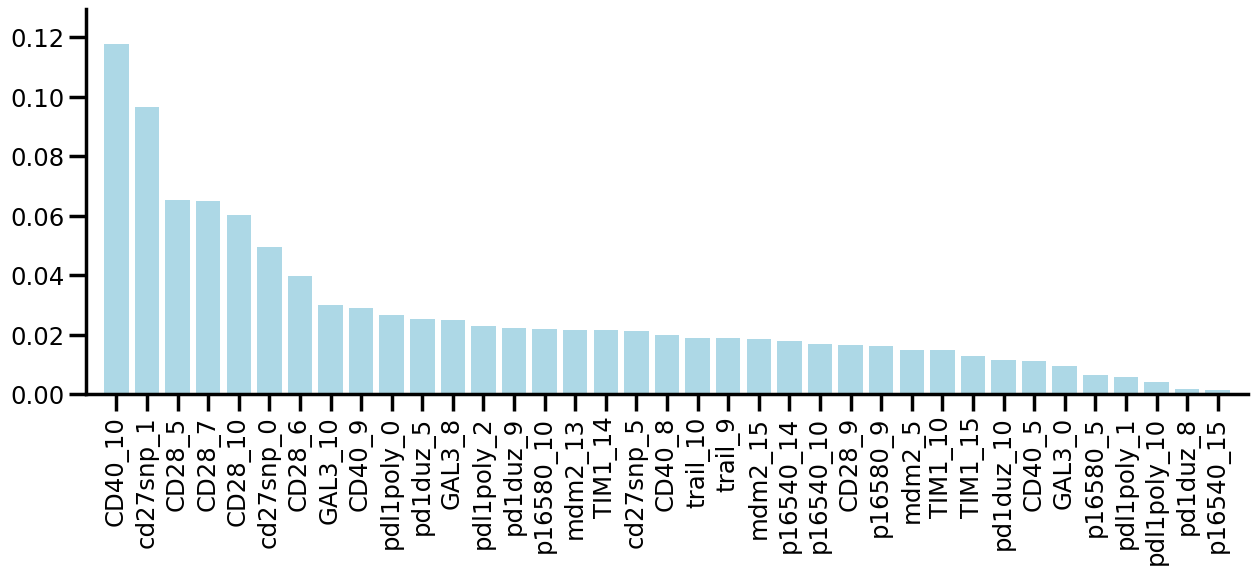

In [7]:
save = f"{main_path}/figures/paper_figures/png/feature_importance_cdt_di_fi_ohe.png"
paper_figure = f"{main_path}/figures/paper_figures/svg/feature_importance_cdt_di_fi_ohe.svg"
figures.feature_importance_plot(cdt_di_fi_ohe.values, targets.values, cdt_di_fi_ohe.columns,
                                save=save, paper_figure=paper_figure)

# Decision Boundaries

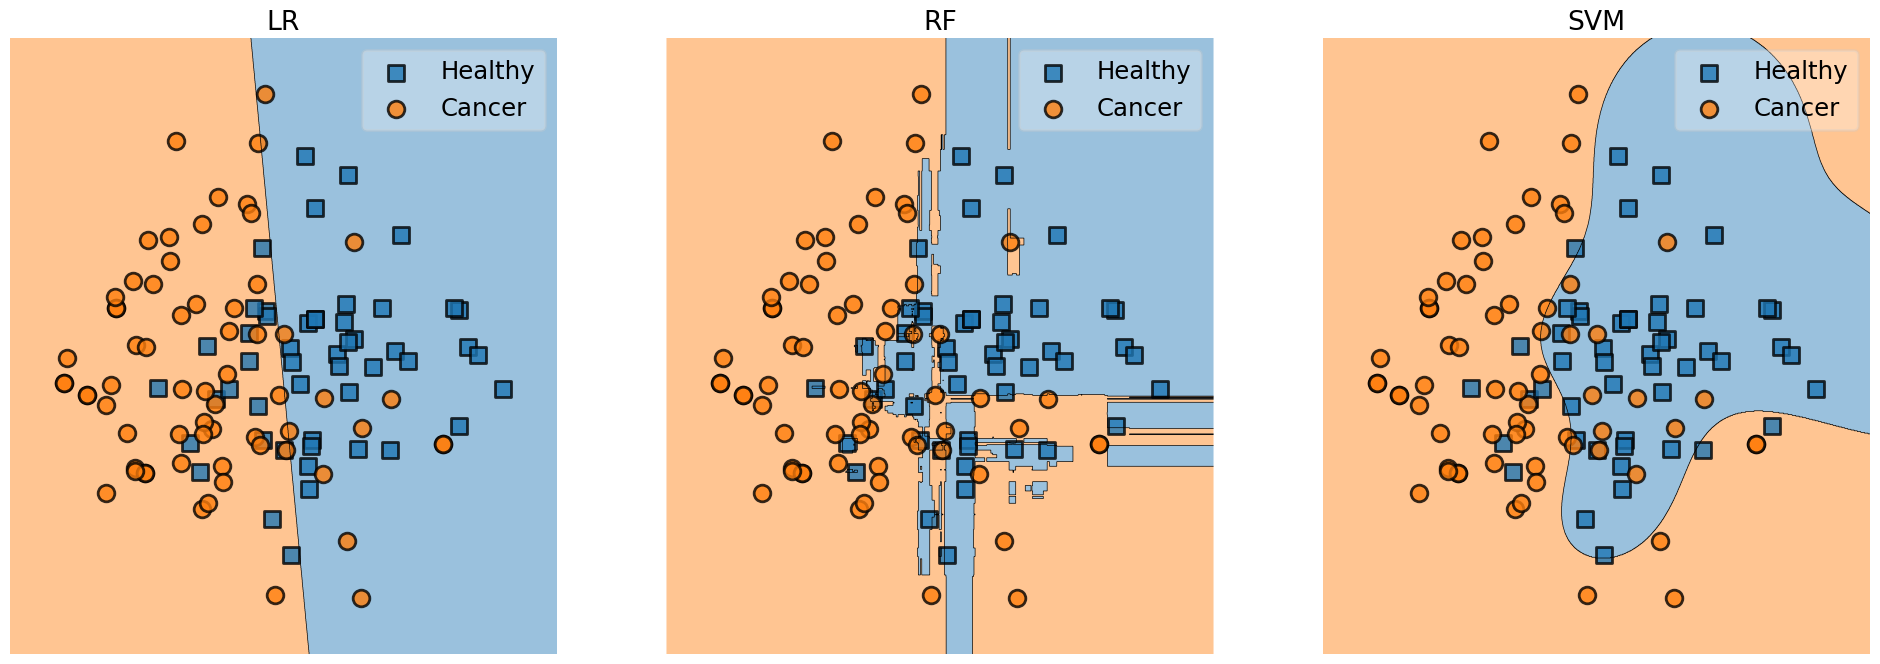

In [8]:
classifier_titles = ['LR', 'RF', 'SVM']
classifiers = [metric_results['cdt_di_fi_ohe'][i.lower()]['best_estimator'] for i in classifier_titles]

save = f"{main_path}/figures/paper_figures/png/decision_boundaries_cdt_di_fi_ohe.png"
paper_figure = f"{main_path}/figures/paper_figures/svg/decision_boundaries_cdt_di_fi_ohe.svg"
figures.plot_decision_boundaries(cdt_di_fi_ohe.values, targets.values.ravel(), 
                                 classifiers, classifier_titles, actual_labels=['Healthy', 'Cancer'],
                                save=save, paper_figure=paper_figure)